# Death Statistics and the frailty index 
## By Gavin Qu, May 28th


1. Load the frailty index data from the specified file.
2. Merge the death information based on pidp.
3. Create a column for each wave indicating death (e.g., b_death, c_death, ..., m_death).
4. Assign a value of 1 indicating death in the corresponding wave's death column and 0 otherwise.

In [20]:
import pandas as pd

# Define the base directory and file paths
base_dir = '/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls'
xhhrel_file = f'{base_dir}/xhhrel.dta'

# Load the 'xhhrel.dta' file
xhhrel_df = pd.read_stata(xhhrel_file, columns=['pidp', 'dcsedw_dv'])

# Map the 'dcsedw_dv' values to the corresponding wave descriptions
death_wave_map = {
    'UKHLS Wave 20': 'b_death', 'UKHLS Wave 21': 'c_death', 'UKHLS Wave 22': 'd_death', 'UKHLS Wave 23': 'e_death',
    'UKHLS Wave 24': 'f_death', 'UKHLS Wave 25': 'g_death', 'UKHLS Wave 26': 'h_death', 'UKHLS Wave 27': 'i_death',
    'UKHLS Wave 28': 'j_death', 'UKHLS Wave 29': 'k_death', 'UKHLS Wave 30': 'l_death', 'UKHLS Wave 31': 'm_death'
}
xhhrel_df['death_wave'] = xhhrel_df['dcsedw_dv'].map(death_wave_map)

# Create columns for each wave indicating death
for wave in death_wave_map.values():
    xhhrel_df[wave] = (xhhrel_df['death_wave'] == wave).astype(int)

# Drop the temporary 'death_wave' column
xhhrel_df.drop(columns=['death_wave'], inplace=True)

# Describe the 'dcsedw_dv' column
description = xhhrel_df['dcsedw_dv'].describe()

# Print the description
print("Description of 'dcsedw_dv' column:")
print(description)

# Print the first few rows of the extracted data
print("\nExtracted data with death indicators:")
print(xhhrel_df.head())

# Optionally, save the extracted data to a new file if needed
output_file = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/extracted_dcsedw_dv_with_deaths.csv'
xhhrel_df.to_csv(output_file, index=False)


Description of 'dcsedw_dv' column:
count           151163
unique              30
top       inapplicable
freq            144151
Name: dcsedw_dv, dtype: object

Extracted data with death indicators:
        pidp     dcsedw_dv  b_death  c_death  d_death  e_death  f_death  \
0        687  inapplicable        0        0        0        0        0   
1       1367  inapplicable        0        0        0        0        0   
2       2051  inapplicable        0        0        0        0        0   
3       2727  inapplicable        0        0        0        0        0   
4  752052125  inapplicable        0        0        0        0        0   

   g_death  h_death  i_death  j_death  k_death  l_death  m_death  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0  
4        0       

It's important we look at the data type of the death variable, turns out it's categorical

In [14]:
import pandas as pd

# Define the base directory and file paths
base_dir = '/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls'
xhhrel_file = f'{base_dir}/xhhrel.dta'

# Load the 'xhhrel.dta' file
xhhrel_df = pd.read_stata(xhhrel_file, columns=['pidp', 'dcsedw_dv'])

# Describe the 'dcsedw_dv' column
description = xhhrel_df['dcsedw_dv'].describe()

# Print the description
print("Description of 'dcsedw_dv' column:")
print(description)

# Extract and display all information about the 'dcsedw_dv' column based on 'pidp'
extracted_df = xhhrel_df[['pidp', 'dcsedw_dv']]

# Print the first few rows of the extracted data
print("\nExtracted data based on 'pidp' and 'dcsedw_dv':")
print(extracted_df.head())


Description of 'dcsedw_dv' column:
count           151163
unique              30
top       inapplicable
freq            144151
Name: dcsedw_dv, dtype: object

Extracted data based on 'pidp' and 'dcsedw_dv':
        pidp     dcsedw_dv
0        687  inapplicable
1       1367  inapplicable
2       2051  inapplicable
3       2727  inapplicable
4  752052125  inapplicable


In [21]:
import pandas as pd

# Load the previously extracted data with death indicators
extracted_file = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/extracted_dcsedw_dv_with_deaths.csv'
extracted_df = pd.read_csv(extracted_file)

# List of death columns from b to m
death_columns = ['b_death', 'c_death', 'd_death', 'e_death', 'f_death', 'g_death', 'h_death', 'i_death', 'j_death', 'k_death', 'l_death', 'm_death']

# Tally the total number of deaths at each wave
death_tally = extracted_df[death_columns].sum()

# Print the total number of deaths at each wave
print("Total number of deaths at each wave:")
print(death_tally)


Total number of deaths at each wave:
b_death    276
c_death    381
d_death    457
e_death    347
f_death    351
g_death    433
h_death    432
i_death    378
j_death    366
k_death    346
l_death    337
m_death    340
dtype: int64


In [22]:
import pandas as pd

# Load the previously extracted death data with death indicators
death_file = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/extracted_dcsedw_dv_with_deaths.csv'
death_df = pd.read_csv(death_file)

# Load the frailty index data
frailty_index_file = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/frailty_index.dta'
frailty_df = pd.read_stata(frailty_index_file)

# Print the first few rows of each dataframe to verify the data
print("Death Data:")
print(death_df.head())
print("\nFrailty Index Data:")
print(frailty_df.head())

# List of death columns from b to m
death_columns = ['b_death', 'c_death', 'd_death', 'e_death', 'f_death', 'g_death', 'h_death', 'i_death', 'j_death', 'k_death', 'l_death', 'm_death']

# Merge the death data with the frailty index data based on 'pidp'
merged_df = frailty_df.merge(death_df[['pidp'] + death_columns], on='pidp', how='left')

# Fill NaN values in death columns with 0 (no death)
for column in death_columns:
    merged_df[column].fillna(0, inplace=True)

# Assign a frailty value of 1 for the relevant column
frailty_columns = ['a_frailty', 'b_frailty', 'c_frailty', 'd_frailty', 'e_frailty', 'f_frailty', 'g_frailty', 'h_frailty', 'i_frailty', 'j_frailty', 'k_frailty', 'l_frailty', 'm_frailty']
for death_col, frailty_col in zip(death_columns, frailty_columns[1:]):  # Starting from 'b_frailty' to match 'b_death'
    merged_df[frailty_col] = merged_df.apply(lambda row: 1 if row[death_col] == 1 else row[frailty_col], axis=1)

# Print the first few rows of the updated dataframe to verify the changes
print("Updated Frailty Index Data with Death Indicators:")
print(merged_df.head())

# Optionally, save the updated dataframe to a new file if needed
output_file = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/updated_frailty_index_with_deaths.csv'
merged_df.to_csv(output_file, index=False)


Death Data:
        pidp     dcsedw_dv  b_death  c_death  d_death  e_death  f_death  \
0        687  inapplicable        0        0        0        0        0   
1       1367  inapplicable        0        0        0        0        0   
2       2051  inapplicable        0        0        0        0        0   
3       2727  inapplicable        0        0        0        0        0   
4  752052125  inapplicable        0        0        0        0        0   

   g_death  h_death  i_death  j_death  k_death  l_death  m_death  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0  

Frailty Index Data:
   a_hcond17  a_disdif8  a_disdif5  a_hcond2  a_hcond6  a_hcond4  a_disdif1  \
0          0          0          0 

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_17797/2609025182.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(0, inplace=True)


Updated Frailty Index Data with Death Indicators:
   a_hcond17  a_disdif8  a_disdif5  a_hcond2  a_hcond6  a_hcond4  a_disdif1  \
0          0          0          0         0         0         0          0   
1          0          0          1         1         0         0          1   
2          0          0          0         0         0         0          0   
3          0          0          0         0         0         0          0   
4          0          0          0         0         0         0          0   

   a_hcond14  a_disdif3  a_disdif10  ...  d_death  e_death  f_death  g_death  \
0          0          0           0  ...      0.0      0.0      0.0      0.0   
1          0          0           0  ...      0.0      0.0      0.0      0.0   
2          0          0           0  ...      0.0      0.0      0.0      0.0   
3          0          0           0  ...      0.0      0.0      0.0      0.0   
4          0          0           0  ...      0.0      0.0      0.0      0.

### New Smoothed Line Plot of Frailty with death added 

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_17797/3626743646.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='age', y='frailty_index', data=scatter_data, ci='sd')


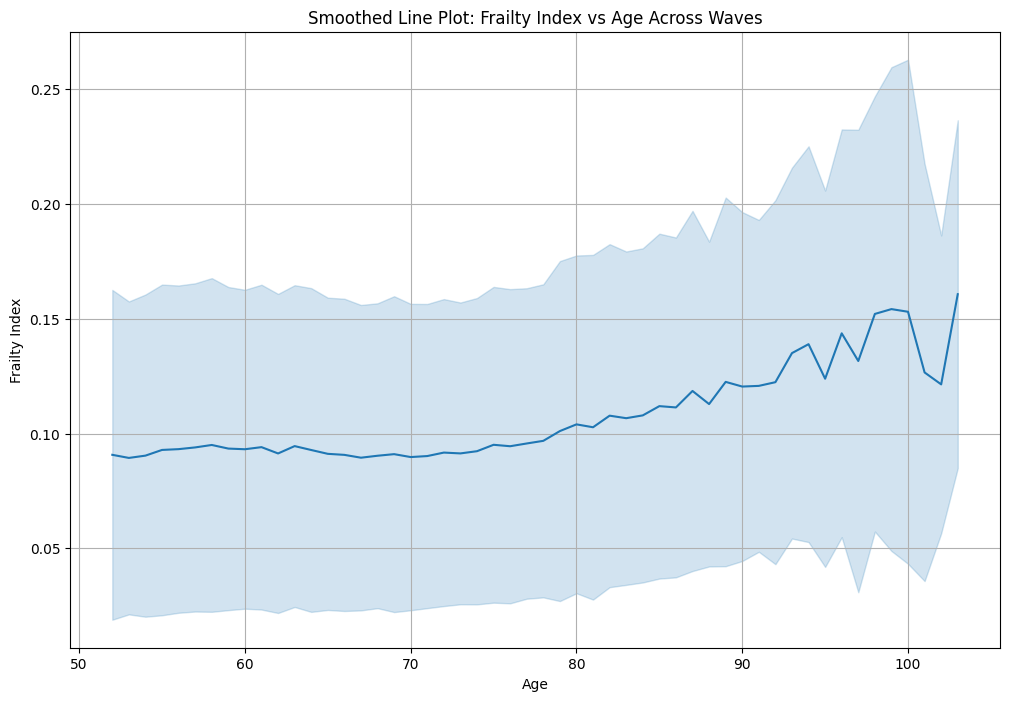

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated frailty index data with death indicators
updated_frailty_index_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/updated_frailty_index_with_deaths.csv'
frailty_data = pd.read_csv(updated_frailty_index_path)

# Define wave prefixes
wave_prefixes = [chr(i) for i in range(ord('a'), ord('n'))]

# Load the cleaned combined data to get the age variables
cleaned_combined_data_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/cleaned_combined_ukhls_hcond_disdif_death_data.dta'
combined_data = pd.read_stata(cleaned_combined_data_path)

# Prepare data for the smoothed line plot
scatter_data = pd.DataFrame()

for prefix in wave_prefixes:
    frailty_col = f'{prefix}_frailty'
    age_col = f'{prefix}_age_dv'
    if frailty_col in frailty_data.columns and age_col in combined_data.columns:
        temp_df = frailty_data[['pidp', frailty_col]].copy()
        temp_age_df = combined_data[['pidp', age_col]].copy()
        temp_df = temp_df.merge(temp_age_df, on='pidp')
        temp_df = temp_df[temp_df[frailty_col] > 0]  # Filter out zero frailty index values
        temp_df['wave'] = prefix
        temp_df = temp_df.rename(columns={frailty_col: 'frailty_index', age_col: 'age'})
        scatter_data = pd.concat([scatter_data, temp_df], ignore_index=True)

# Create smoothed line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='age', y='frailty_index', data=scatter_data, ci='sd')
plt.xlabel('Age')
plt.ylabel('Frailty Index')
plt.title('Smoothed Line Plot: Frailty Index vs Age Across Waves')
plt.grid(True)
plt.show()


In [25]:
import pandas as pd

# Load the updated frailty index data with death indicators
updated_frailty_index_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/updated_frailty_index_with_deaths.csv'
frailty_data = pd.read_csv(updated_frailty_index_path)

# Define wave prefixes
wave_prefixes = [chr(i) for i in range(ord('a'), ord('n'))]

# Count the number of frailty index values of 1 for each wave
frailty_counts = {}

for prefix in wave_prefixes:
    frailty_col = f'{prefix}_frailty'
    if frailty_col in frailty_data.columns:
        frailty_counts[frailty_col] = (frailty_data[frailty_col] == 1).sum()

# Print the counts
print("Count of frailty index values of 1 for each wave:")
for wave, count in frailty_counts.items():
    print(f"{wave}: {count}")


Count of frailty index values of 1 for each wave:
a_frailty: 0
b_frailty: 211
c_frailty: 528
d_frailty: 877
e_frailty: 1057
f_frailty: 1316
g_frailty: 1841
h_frailty: 2163
i_frailty: 2158
j_frailty: 2391
k_frailty: 2528
l_frailty: 2681
m_frailty: 2991


In [34]:
import pandas as pd

# Load the updated frailty index data with death indicators
updated_frailty_index_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/updated_frailty_index_with_deaths.csv'
frailty_data = pd.read_csv(updated_frailty_index_path)

# Define wave prefixes
wave_prefixes = [chr(i) for i in range(ord('a'), ord('n'))]

# Prepare a list to collect unique pidp values associated with death
unique_pidp = []

for prefix in wave_prefixes:
    frailty_col = f'{prefix}_frailty'
    if frailty_col in frailty_data.columns:
        # Filter only frailty index values of 1
        temp_df = frailty_data[frailty_data[frailty_col] == 1][['pidp', frailty_col]]
        
        # Collect unique pidp values
        unique_pidp_wave = temp_df['pidp'].unique()
        unique_pidp.append((prefix, unique_pidp_wave))

# Print out the unique pidp values associated with death for each wave
for prefix, pidp_values in unique_pidp:
    print(f"Wave {prefix}: Unique pidp associated with death = {pidp_values}")
    print(f"Total unique deaths in Wave {prefix}: {len(pidp_values)}")


Wave a: Unique pidp associated with death = []
Total unique deaths in Wave a: 0
Wave b: Unique pidp associated with death = [  68095887   68726247   69181851   69565375  136545371  136653487
  136969687  137055367  137300171  137383127  137457927  138733611
  204176811  204599767  205036331  205160091  205204287  205336887
  206632971  272065287  272357007  272360411  272422291  272439287
  272622211  272737807  272840487  273118607  273216527  273279091
  273387887  340030611  340166607  340181571  340496407  340502531
  340775207  341019327  341254607  408286967  408450851  408515447
  408556251  408969703  409104331  409236927  410480647  410550007
  476169327  476607247  476670487  476727607  476739847  476945207
  478694167  478702335  544047607  544235967  544308731  544324367
  544656887  544800367  544833007  544971047  545226727  545795887
  612128527  612195167  612436567  612635127  612681371  613053327
  613162131  613318527  614655407  614672427  680149607  680355647
  680

In [35]:
import pandas as pd

# Load the cleaned combined data to get the age variables
cleaned_combined_data_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/cleaned_combined_ukhls_hcond_disdif_death_data.dta'
combined_data = pd.read_stata(cleaned_combined_data_path)

# Define wave prefixes
wave_prefixes = [chr(i) for i in range(ord('a'), ord('n'))]

# Prepare data for the scatter plot
scatter_data = pd.DataFrame()

# Loop through each wave prefix to match unique pidp values with corresponding age
for prefix in wave_prefixes:
    frailty_col = f'{prefix}_frailty'
    age_col = f'{prefix}_age_dv'
    
    if frailty_col in frailty_data.columns and age_col in combined_data.columns:
        # Filter only frailty index values of 1
        temp_df = frailty_data[frailty_data[frailty_col] == 1][['pidp', frailty_col]].copy()
        temp_age_df = combined_data[['pidp', age_col]].copy()
        
        # Merge to get the corresponding age values
        merged_df = temp_df.merge(temp_age_df, on='pidp', how='left')
        
        # Print the result for debugging
        print(f"Wave {prefix}: Merged Data (Frailty and Age) Head =\n{merged_df.head()}")
        
        if not merged_df.empty:
            merged_df['wave'] = prefix
            merged_df = merged_df.rename(columns={frailty_col: 'frailty_index', age_col: 'age'})
            scatter_data = pd.concat([scatter_data, merged_df], ignore_index=True)

# Print the combined scatter data for debugging
print("Combined Scatter Data Head:")
print(scatter_data.head())

# Optionally save the scatter data to a new file if needed
output_file = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/scatter_data_with_age.csv'
scatter_data.to_csv(output_file, index=False)


Wave a: Merged Data (Frailty and Age) Head =
Empty DataFrame
Columns: [pidp, a_frailty, a_age_dv]
Index: []
Wave b: Merged Data (Frailty and Age) Head =
        pidp  b_frailty  b_age_dv
0   68095887        1.0       NaN
1   68726247        1.0       NaN
2   69181851        1.0       NaN
3   69565375        1.0       NaN
4  136545371        1.0       NaN
Wave c: Merged Data (Frailty and Age) Head =
       pidp  c_frailty  c_age_dv
0  68034007        1.0       NaN
1  68034007        1.0       NaN
2  68048291        1.0       NaN
3  68048291        1.0       NaN
4  68161167        1.0       NaN
Wave d: Merged Data (Frailty and Age) Head =
       pidp  d_frailty  d_age_dv
0  68075487        1.0       NaN
1  68075487        1.0       NaN
2  68075487        1.0       NaN
3  68299887        1.0       NaN
4  68299887        1.0       NaN
Wave e: Merged Data (Frailty and Age) Head =
       pidp  e_frailty  e_age_dv
0  68044891        1.0       NaN
1  68044891        1.0       NaN
2  68044891  